## Why reinvent the wheel when there is already heapq built-in python3?

The is sustainable shortcut to growth without getting your hand dirty :D 

Priority Queue is just an abstract way to call a datatype, not a real data structure to implement

Heap is a data structure, a way to store the data makes a certain operation easier. (so specialized that I barely see it in any of my real life experience. In fact in one of my course about discrete math, I learned about Dijkstra's algorithm and prim, it could have been introduced. But lecturer didn't mention about the implementation of heap at all. 

### In term of Visualization, heap looks like binary tree. 
The key difference is that:
    
    - In BST left node is less than parent node, and right node is greater than parent node. 
    
    - In heap, the value of children nodes are less/greater than parent node. Root node is the smallest/biggest among all the other nodes of the tree
    
### Applicaion of Heap
Max-heap or Min-heap is useful while working Dijkstra's algorithm, prim algorithm, on the operating system for job scheduling algorithm and order statistics. 

To build a heap it costs: `O(n*log(n))` breakdown into call for heapify costs `O(log(n))` and cost of building heap (heappush, heappop) is `O(n)`. 

Therefore: insert and delete cost: `O(log(n))`



for min-heap finding min O(1) and same thing for finding max in max heap



### Min Heap in Python

(from GeaksforGeeks and Wiki)

The illustration is max heap

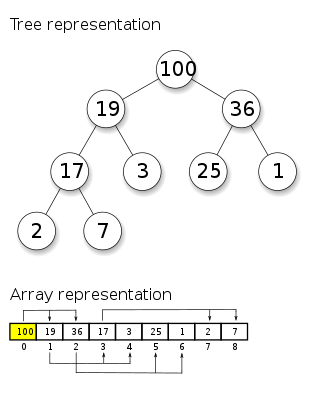

Abeit a heap can be visualized as a tree, it can also store inform of array with the root start at `Arr[0]` for any ith node: 

`Arr[(i-1)//2]` returns its parent node <br />
`Arr[(2*i)+1]` returns left child node <br />
`Arr[(2*i)+2]` returns right child node <br />

There are only three crucial function for heap (the use of its is more important: `heapify()` , `heappush(element)`, `heappop()` 

In [9]:
import sys

class MinHeap:
    
    def __init__(self, maxsize):
        self.maxsize = maxsize
        self.size = 0
        # the core heap is an array with specialized indexing methods
        self.Heap = [0] * (self.maxsize +1)
        # set to something very small
        self.Heap[0] = -1 * sys.maxsize
        self.root = 1
        
    def __repr__(self) -> str:
        description = f'MinHeap object with'
        for attribute in ['maxsize', 'size', 'root','Heap']:
            if hasattr(self, attribute):
                description += f'\n {attribute}: {getattr(self, attribute)}'
        return description
    
    def parent(self, pos):
        return pos//2
    
    def get_left_child_index(self, pos):
        return 2*pos
    
    def get_right_child_index(self, pos):
        return (2*pos) + 1
    
    # support function to identify if the current position is not a leaf node
    def is_leaf(self, pos):
        if pos >= (self.size//2) and pos <= self.size:
            return True
        return False
    
    def swapnodes(self, node1, node2):
        self.Heap[node1], self.Heap[node2] = self.Heap[node2], self.Heap[node1]   
        
    # function to heapify the node at pos    
    def heapify(self, pos):
        # if the node is a non-leaf node and greater
        if not self.is_leaf(pos):
            if (self.Heap[pos] > self.Heap[self.get_left_child_index(pos)] or
            self.Heap[pos] > self.Heap[self.get_right_child_index(pos)]):
                # Swap with the left child and heapify
                # the left child
                if self.Heap[self.get_left_child_index(pos)] < self.Heap[self.get_right_child_index(pos)]:
                    self.swapnodes(pos, self.get_left_child_index(pos) )
                    # keep going down to the list recursively
                    self.heapify(self.get_left_child_index(pos))
                # Swap with the right child and heapify
                # the right child
                else:
                    self.swapnodes(pos, self.get_right_child_index(pos))
                    self.heapify(self.get_right_child_index(pos))
                
    # Heap push function
    def heappush(self, element):
        if self.size >= self.maxsize :
            return
        self.size+= 1
        self.Heap[self.size] = element
 
        current = self.size
 
        while self.Heap[current] < self.Heap[self.parent(current)]:
            self.swapnodes(current, self.parent(current))
            current = self.parent(current)
                
    # Heap pop function
    def heappop(self):
        popped = self.Heap[self.root]
        self.Heap[self.root] = self.Heap[self.size]
        self.size -= 1
        self.heapify(self.root)
        return popped
    
    def build_heap(self):
        for pos in range(self.size//2, 0, -1):
            self.heapify(pos)
    
    # that's from GeeksforGeeks but I don't think it's enough
        

In [10]:
print('The minHeap is ')

The minHeap is 


In [16]:
minHeap = MinHeap(15)

print('init',minHeap)
for value in [5,3,17,10,84,19, 6,22,9]:
    minHeap.heappush(value)
    print(minHeap)
# that is heap already

init MinHeap object with
 maxsize: 15
 size: 0
 root: 1
 Heap: [-9223372036854775807, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
MinHeap object with
 maxsize: 15
 size: 1
 root: 1
 Heap: [-9223372036854775807, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
MinHeap object with
 maxsize: 15
 size: 2
 root: 1
 Heap: [-9223372036854775807, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
MinHeap object with
 maxsize: 15
 size: 3
 root: 1
 Heap: [-9223372036854775807, 3, 5, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
MinHeap object with
 maxsize: 15
 size: 4
 root: 1
 Heap: [-9223372036854775807, 3, 5, 17, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
MinHeap object with
 maxsize: 15
 size: 5
 root: 1
 Heap: [-9223372036854775807, 3, 5, 17, 10, 84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
MinHeap object with
 maxsize: 15
 size: 6
 root: 1
 Heap: [-9223372036854775807, 3, 5, 17, 10, 84, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0]
MinHeap object with
 maxsize: 15
 size: 7
 root: 1
 Heap: [-9223372036854775807, 3, 5, 6, 10, 84, 19, 1

In [15]:
minHeap.build_heap()
minHeap

MinHeap object with
 maxsize: 15
 size: 9
 root: 1
 Heap: [-9223372036854775807, 3, 5, 6, 9, 84, 19, 17, 22, 10, 0, 0, 0, 0, 0, 0]

In [17]:
print(minHeap.heappop())

3


In [ ]:
input_list = [0,9,1,5,2,5,6,2,11,4,3,5,7]
